

**PROJECT TITLE : CHURN PREDICTION USING SURVIVAL ANALYSIS**

*objective:*
     To predict customer churn over time using Survival Analysis and identify
     high-risk periods where customers are more likely to churn.


**I. Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np

**II. Load the Dataset**

In [2]:
df = pd.read_excel("churn_prediction.xlsx")

**III. Performing Data Inspection**

In [3]:
df.head(5)


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.tail()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes
999,1000,50,Male,1,56.67,Month-to-Month,NaN,56.67,No,Yes


In [5]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [6]:
df.shape

(1000, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


**IV. Converting column names into lowercase**

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'monthlycharges',
       'contracttype', 'internetservice', 'totalcharges', 'techsupport',
       'churn'],
      dtype='object')

**V. Performing Data Cleaning Steps**

In [9]:
#Checking for null values

df.isnull().sum()

customerid           0
age                  0
gender               0
tenure               0
monthlycharges       0
contracttype         0
internetservice    297
totalcharges         0
techsupport          0
churn                0
dtype: int64

In [10]:
df['internetservice'] = df['internetservice'].fillna("Unknown")
df.head(10)


,customerid,age,gender,tenure,monthlycharges,contracttype,internetservice,totalcharges,techsupport,churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Unknown,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,Unknown,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,Unknown,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [11]:
df.isnull().sum()

customerid         0
age                0
gender             0
tenure             0
monthlycharges     0
contracttype       0
internetservice    0
totalcharges       0
techsupport        0
churn              0
dtype: int64

In [12]:
df.duplicated().sum()


np.int64(0)

In [13]:
df.drop('customerid', axis=1)

,age,gender,tenure,monthlycharges,contracttype,internetservice,totalcharges,techsupport,churn
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,42,Male,32,69.01,Month-to-Month,Unknown,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...
995,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,62,Male,9,80.93,Month-to-Month,Unknown,728.37,No,Yes
997,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,39,Male,68,65.67,One-Year,Unknown,4465.56,No,Yes


**VI. Exploratory Data Analysis(EDA)**
*EDA is the process of exploring and understanding your dataset using summary statistics, tables, and visualizations.*


**1. Univariate Analysis**
              Analyzing one column at a time to understand its distribution or pattern.
              
**2. Bivariate Analysis**
             Analyzing two columns together to understand the relationship between them.
             
**3. Multivariate Analysis**
             Analyzing three or more columns together to understand complex relationships.

In [14]:
#Imports + Load data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("churn_prediction.xlsx")
sns.set(style="whitegrid")

**VII. UNIVARIATE - HISTOGRAM (NUMERICAL COLUMN)**


**Univariate Analysis**

*Analyzing one column at a time to understand its distribution or pattern.*

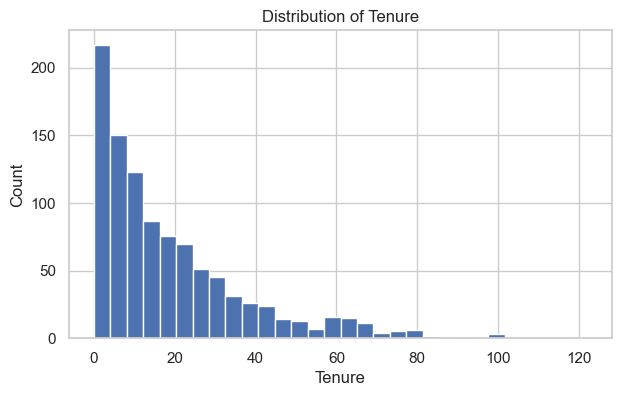

In [15]:
plt.figure(figsize=(7,4))
plt.hist(df['Tenure'], bins=30)
plt.title("Distribution of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()


**UNIVARIATE — BAR CHART (CATEGORICAL COLUMN)**

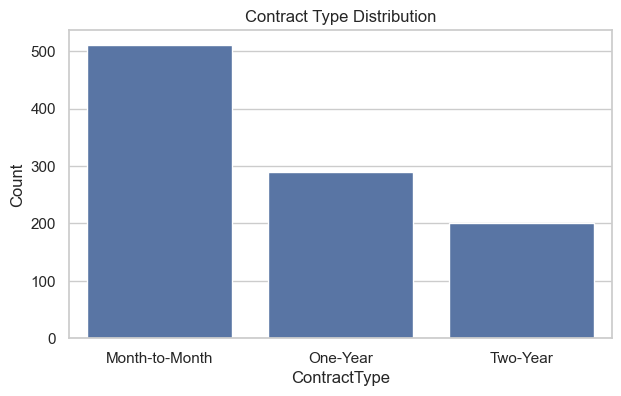

In [16]:
plt.figure(figsize=(7,4))
sns.countplot(x='ContractType', data=df)
plt.title("Contract Type Distribution")
plt.xlabel("ContractType")
plt.ylabel("Count")
plt.show()


**VIII. BIVARIATE — SCATTER PLOT (NUMERICAL VS NUMERICAL)**

**Bivariate Analysis**

*Analyzing two columns together to understand the relationship between them.*

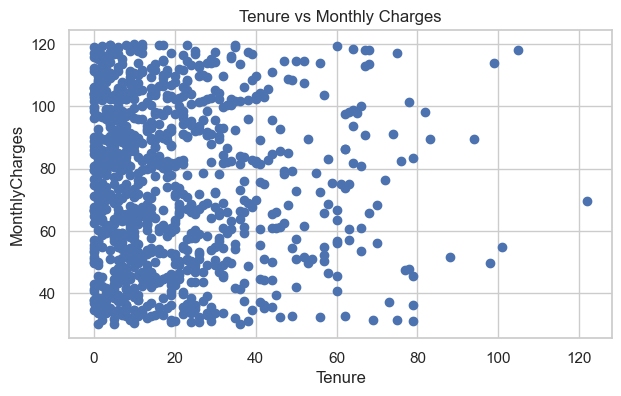

In [17]:
plt.figure(figsize=(7,4))
plt.scatter(df['Tenure'], df['MonthlyCharges'])
plt.title("Tenure vs Monthly Charges")
plt.xlabel("Tenure")
plt.ylabel("MonthlyCharges")
plt.show()


**BIVARIATE — BOX PLOT (CATEGORICAL VS NUMERICAL)**

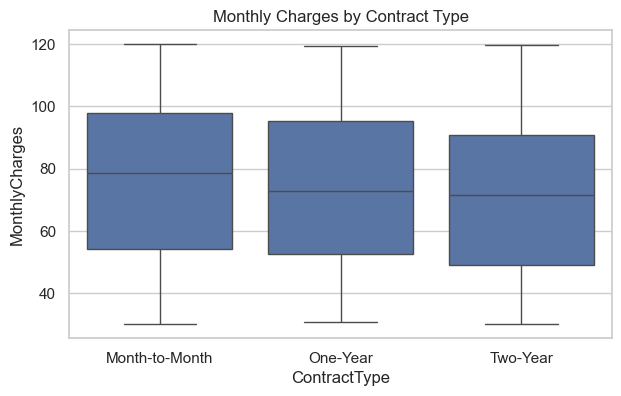

In [18]:
plt.figure(figsize=(7,4))
sns.boxplot(x='ContractType', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Contract Type")
plt.xlabel("ContractType")
plt.ylabel("MonthlyCharges")
plt.show()


**IX. MULTIVARIATE — HEATMAP (CORRELATION OF NUMERIC FEATURES)**

**Multivariate Analysis**

*Analyzing three or more columns together to understand complex relationships.*

<Axes: >

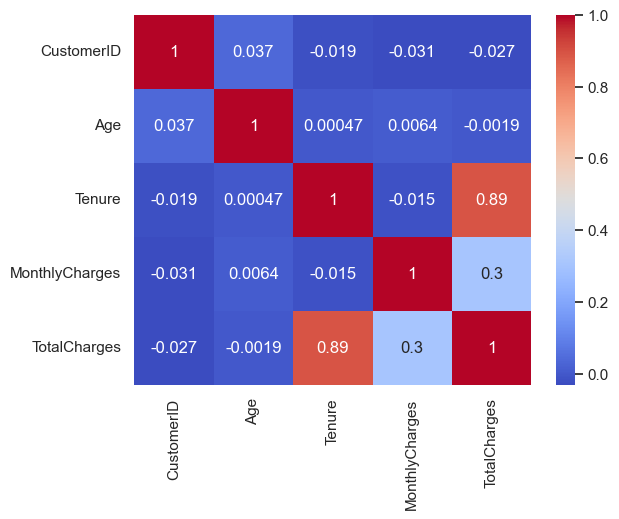

In [19]:
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')


**X. PLOTS FOR SURVIVAL ANALYSIS**



**Kaplan-Meier (Survival Curve)**

*Estimates the probability of survival over time, showing the proportion of subjects who have not experienced the event (e.g., customer churn) at each time point.*




In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, NelsonAalenFitter


Value counts for Churn:
 Churn
1    883
0    117
Name: count, dtype: int64
Unique tenure values: 87


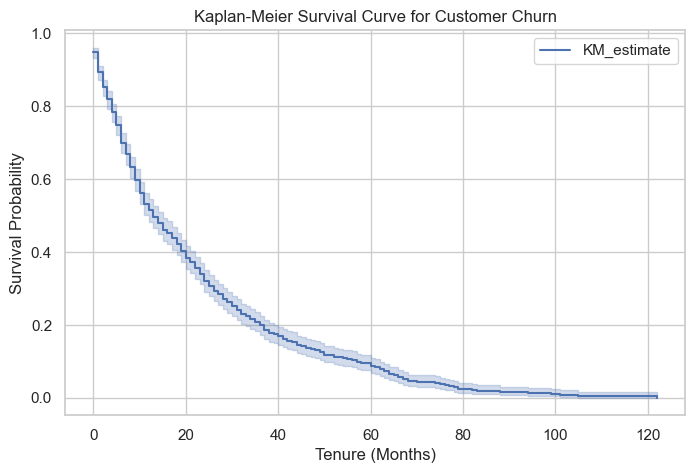

In [21]:
df = pd.read_excel("churn_prediction.xlsx")

# Strip column names
df.columns = df.columns.str.strip()

# Convert Tenure to numeric
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')

# Map Churn to 0/1
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Fill missing values
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())
df['Churn'] = df['Churn'].fillna(0).astype(int)

# Check data
print("Value counts for Churn:\n", df['Churn'].value_counts())
print("Unique tenure values:", df['Tenure'].nunique())


# Kaplan-Meier Survival Curve

kmf = KaplanMeierFitter()
kmf.fit(durations=df['Tenure'], event_observed=df['Churn'])

plt.figure(figsize=(8,5))
kmf.plot(ci_show=True)
plt.title("Kaplan-Meier Survival Curve for Customer Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()


*The survival curve drops steeply during the initial months, indicating high churn risk for new customers. After a certain period, churn probability stabilizes.*

**Cumulative Hazard Curve(Nelson Aalen)**

*Shows the accumulated risk of the event over time, representing how the hazard (chance of event) builds up as time progresses.*


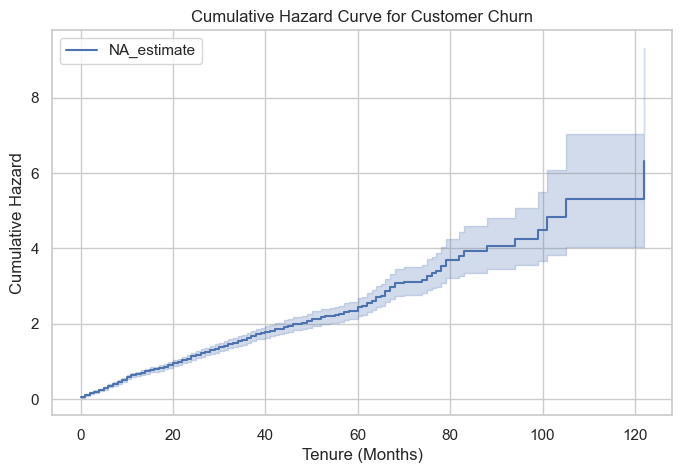

In [22]:

# Cumulative Hazard Curve

naf = NelsonAalenFitter()
naf.fit(durations=df['Tenure'], event_observed=df['Churn'])

plt.figure(figsize=(8,5))
naf.plot(ci_show=True)
plt.title("Cumulative Hazard Curve for Customer Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Cumulative Hazard")
plt.grid(True)
plt.show()


*A steadily increasing cumulative hazard indicates a gradual accumulation of churn risk over time. A near-linear curve suggests consistent churn risk.*


**XI. CLASSIFICATION**

*Classification is a machine learning method used to predict categories (labels).*

It answers questions like Yes/No, Spam/Not Spam, Churn/Not Churn, etc.

In [23]:
# Import Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report





In [24]:
df = pd.read_excel("churn_prediction.xlsx")

In [25]:
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()
df['Churn'] = df['Churn'].map({'yes': 1, 'no': 0})

In [26]:
# Handle numeric missing values (median)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Handle categorical missing values (mode)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [27]:
# Label Encode Categorical Columns
#Label encoding is applied to categorical variables to make them compatible with survival models.

label = LabelEncoder()                                
for col in cat_cols:
    df[col] = label.fit_transform(df[col])

In [28]:
# Split Features & Target
X = df.drop(['Churn'], axis=1)   
y = df['Churn']   

In [29]:
print(df['Churn'].value_counts())


Churn
1    883
0    117
Name: count, dtype: int64


In [30]:
print(df['Churn'].value_counts(dropna=False))


Churn
1    883
0    117
Name: count, dtype: int64


In [31]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify = y)

In [32]:
#Build Random Forest Classifier

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
#  Predictions
y_pred = model.predict(X_test)

In [34]:
# Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[ 23   0]
 [  0 177]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



**Business Recommendation**

*Limitations:*

-> Dataset size is limited
-> External behavioral factors not included

*Future Scope:*

-> Deploy using Streamlit
-> Integrate real-time churn monitoring